In [6]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [7]:
df = pd.read_csv('summary.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 21 columns):
lut_used               16 non-null float64
lut_available          16 non-null float64
lut_logic_used         16 non-null float64
lut_logic_available    16 non-null float64
lut_mem_used           16 non-null float64
lut_mem_available      16 non-null float64
reg_used               16 non-null float64
reg_available          16 non-null float64
reg_ff_used            16 non-null float64
reg_ff_available       16 non-null float64
reg_latch_used         16 non-null float64
reg_latch_available    16 non-null float64
bram_tile_used         16 non-null float64
bram_tile_available    16 non-null float64
bram36_used            16 non-null float64
bram36_available       16 non-null float64
bram18_used            16 non-null float64
bram18_available       16 non-null float64
dsp_used               16 non-null float64
dsp_available          16 non-null float64
unroll                 16 non-null in

In [10]:
info_keys = [ 
    'unroll',
]
keys = [
        'lut',
        'lut_logic',
        'lut_mem',
        'reg',
        'reg_ff',
        'reg_latch',
        'bram_tile',
        'bram36',
        'bram18',
        'dsp',
]

Text(0.5, 0.07, 'Misalgined Unrolling (Partitioning = 8) - Absolute Resource Usages')

<Figure size 432x288 with 0 Axes>

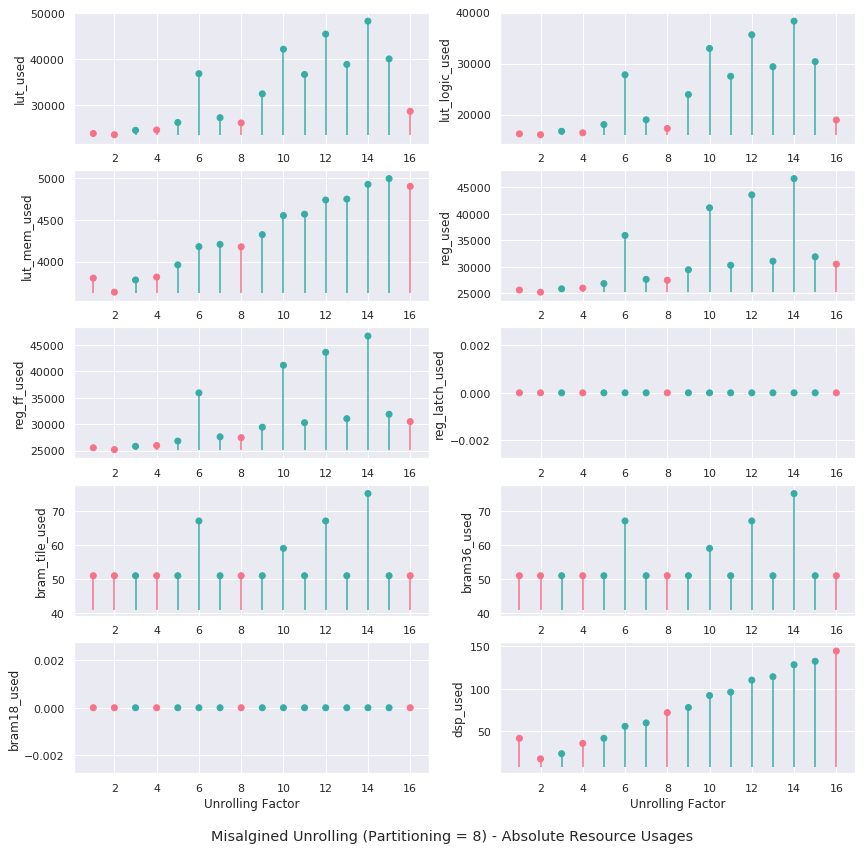

In [11]:
import math
plt.figure()
sns.set()

# Configuration for subplot
cols = 2
rows = int(len(keys) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(14, 14))
pal = sns.color_palette('husl', 8).as_hex()

for idx, k in enumerate(keys):
    key = k + "_used"
    # Get current axes for the subplot
    ax = axes[int(idx / cols), idx % cols]
    plt.sca(ax)
    # Manually add each point to the current scatter plot.
    # This lets us control the color and shape of point.
    small_df = df[['unroll', key]].copy().sort_values(by='unroll')
    my_color = np.where(128 % small_df['unroll'] == 0, pal[0], pal[4])
    ymin = small_df.min()[key] - min(small_df.std()[key] * 10, 10)
    plt.vlines(x='unroll', ymax=key, data=small_df, ymin=ymin, color=my_color)
    plt.scatter(x='unroll', y=key, data=small_df, color=my_color)
    plt.ylabel(key)
        
for col in range(cols):
    axes[rows - 1, col].set(xlabel='Unrolling Factor')
    
fig.suptitle('Spatial GeMM ncubed sweep - Absolute Resource Usages', y=0.07)

In [12]:
fig.savefig('absolute.png', dpi=300)